In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
df = pd.read_csv("/Users/brianblood/Downloads/Lab 4 data_2.csv")
df.head()

,A,B,C,Trial 1,Trial 2,Trial 3
0,-1,-1,-1,2.64,2.60,2.21
1,-1,-1,1,2.18,1.76,2.16
2,-1,1,-1,2.53,2.01,2.41
3,-1,1,1,2.21,2.40,2.23
4,1,-1,-1,4.81,3.70,3.63


In [30]:
cols = df.columns.drop(['A', 'B', 'C'])
print(cols)

Index(['Trial 1', 'Trial 2', 'Trial 3'], dtype='object')


In [31]:
helicopter = df.melt(id_vars=['A', 'B', 'C'], value_vars=cols, value_name='time')
helicopter.drop(columns='variable', inplace=True)
helicopter.head()

,A,B,C,time
0,-1,-1,-1,2.64
1,-1,-1,1,2.18
2,-1,1,-1,2.53
3,-1,1,1,2.21
4,1,-1,-1,4.81


In [32]:
helicopter_model = ols("time ~ A + B + C + A:B + A:C + B:C ", data=helicopter).fit()
helicopter_summary = sm.stats.anova_lm(helicopter_model, typ=2)
helicopter_summary

,sum_sq,df,F,PR(>F)
A,6.181350,1.0,72.185577,1.593397e-07
B,0.340817,1.0,3.980044,6.232749e-02
C,1.325400,1.0,15.477972,1.069341e-03
A:B,0.464817,1.0,5.428112,3.239512e-02
A:C,0.308267,1.0,3.599927,7.490107e-02
B:C,0.375000,1.0,4.379236,5.168832e-02
Residual,1.455733,17.0,NaN,NaN


<Axes: >

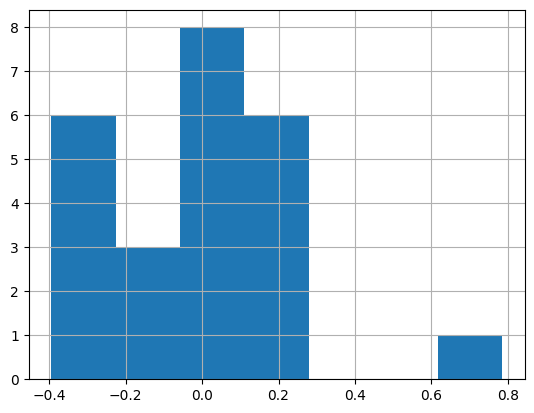

In [46]:
helicopter_model.resid.hist(bins=7)

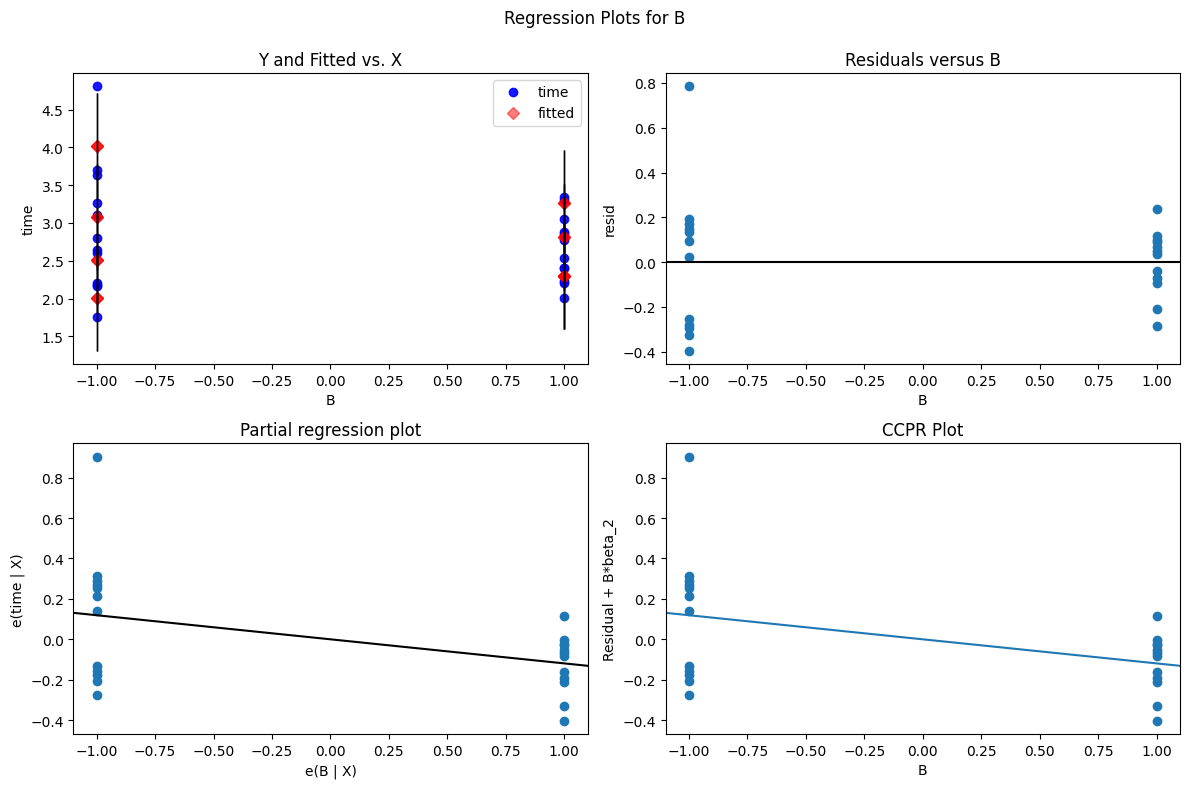

In [33]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(helicopter_model, 'B', fig=fig)

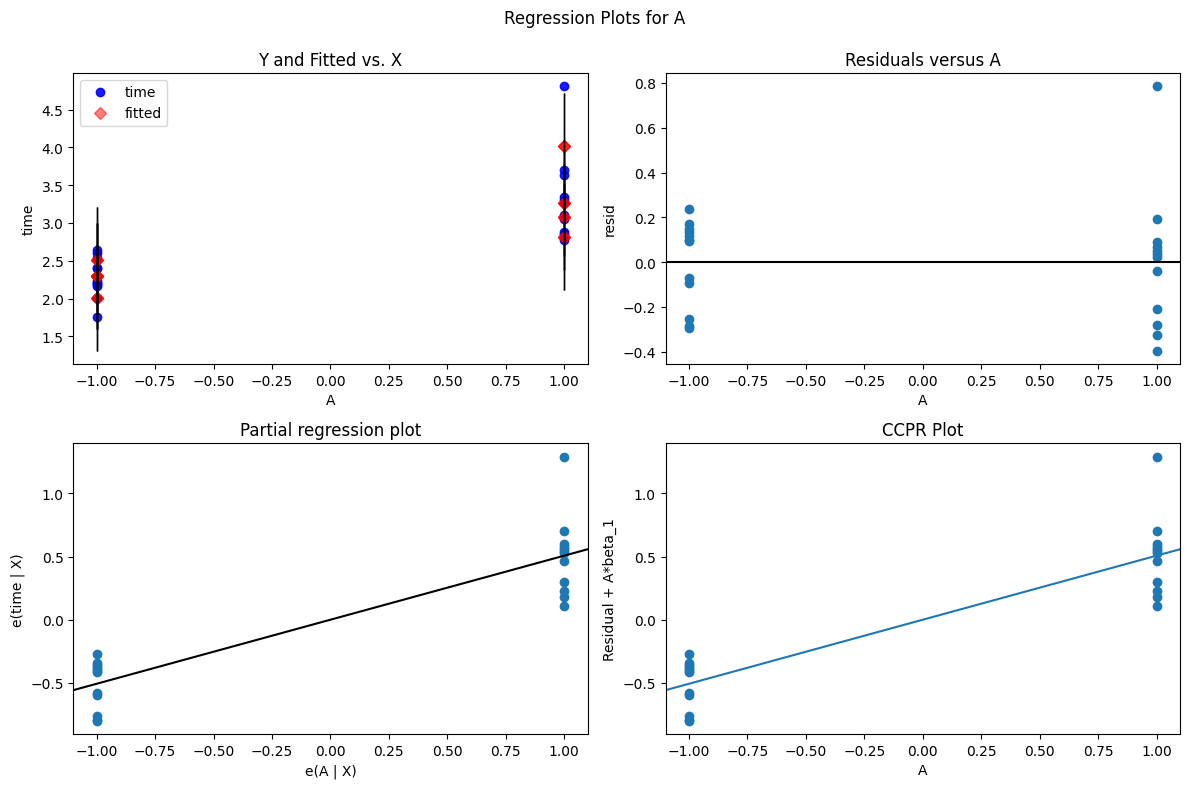

In [34]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(helicopter_model, 'A', fig=fig)

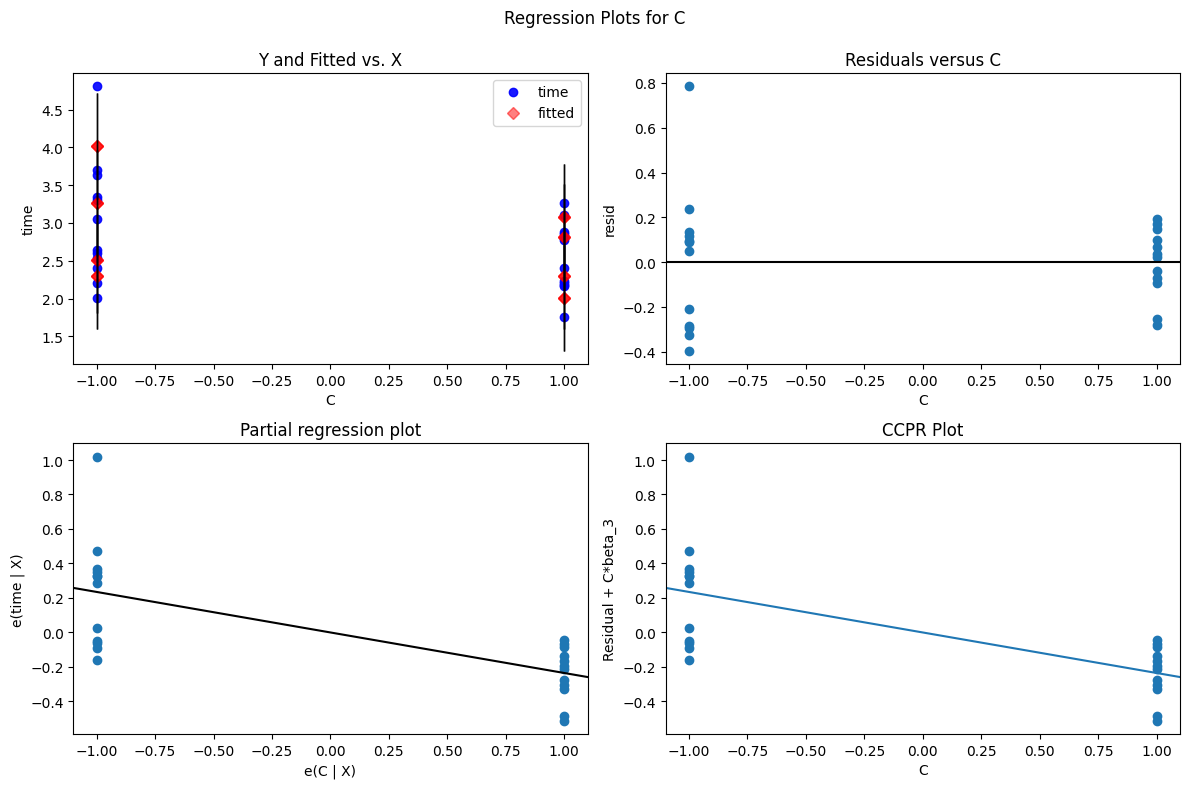

In [35]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(helicopter_model, 'C', fig=fig)

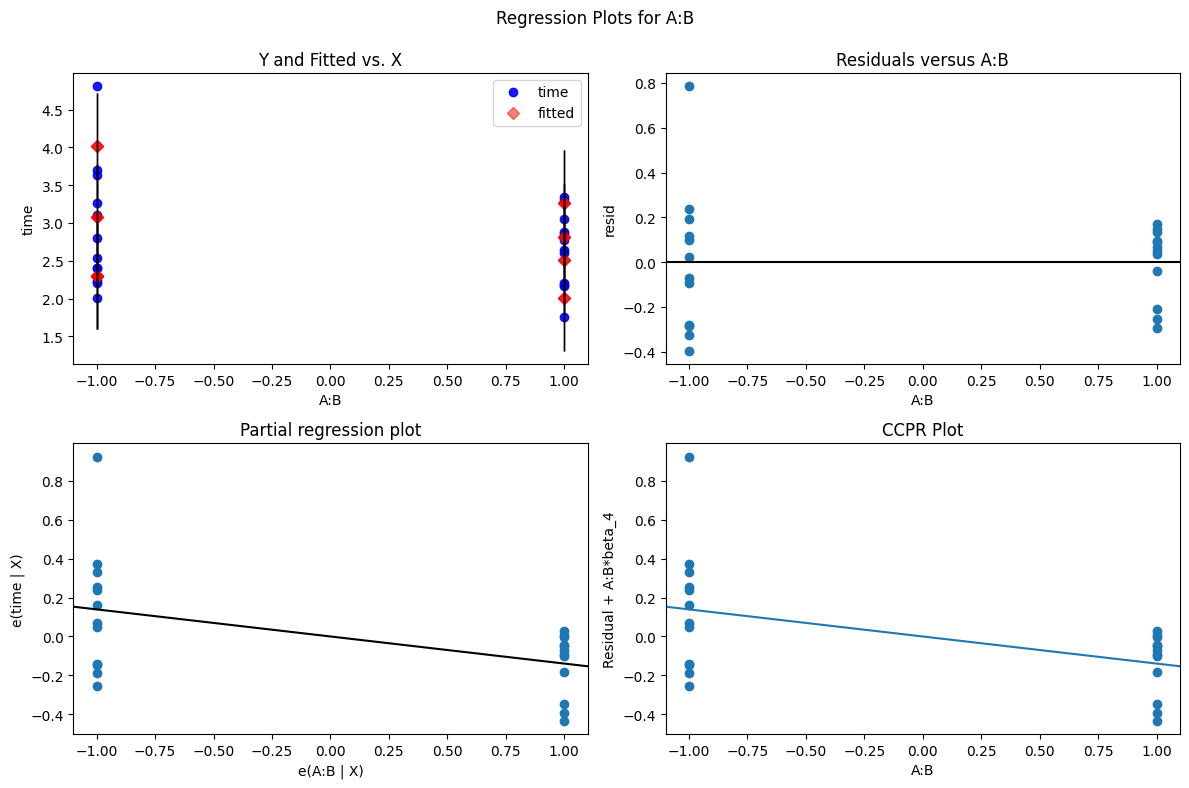

In [36]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(helicopter_model, 'A:B', fig=fig)

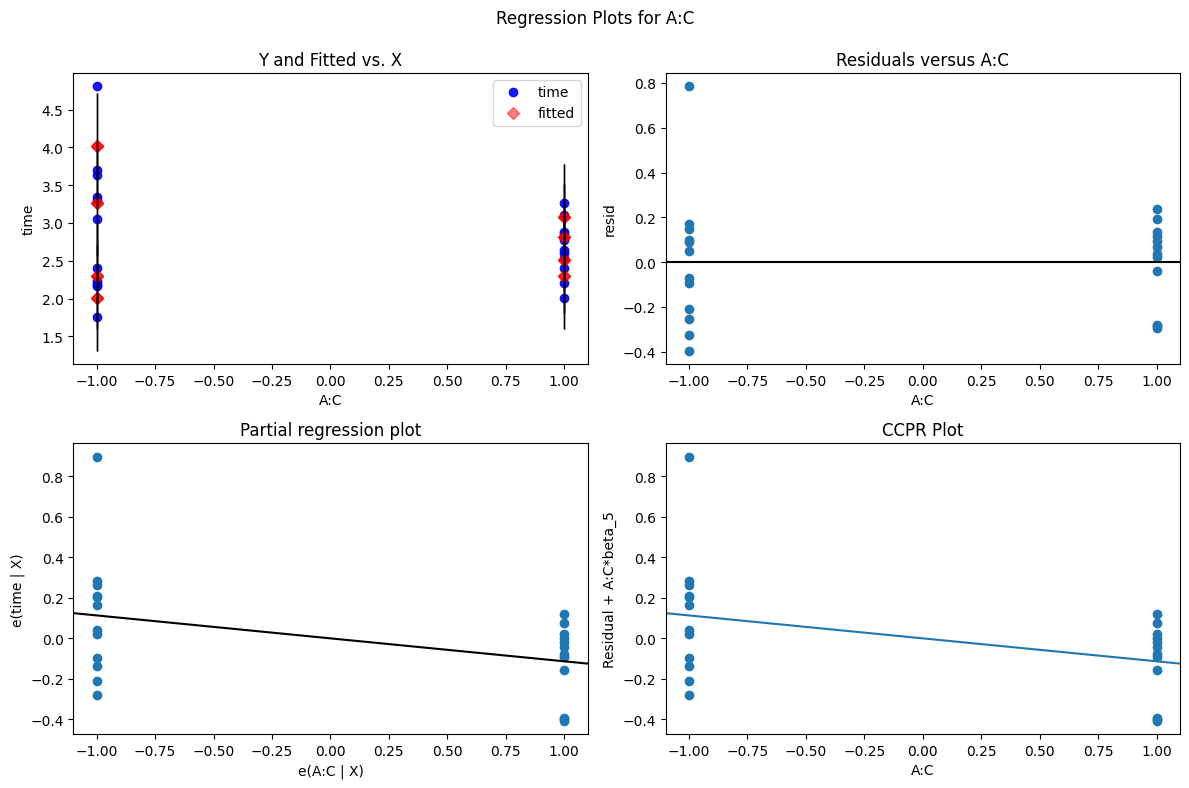

In [37]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(helicopter_model, 'A:C', fig=fig)

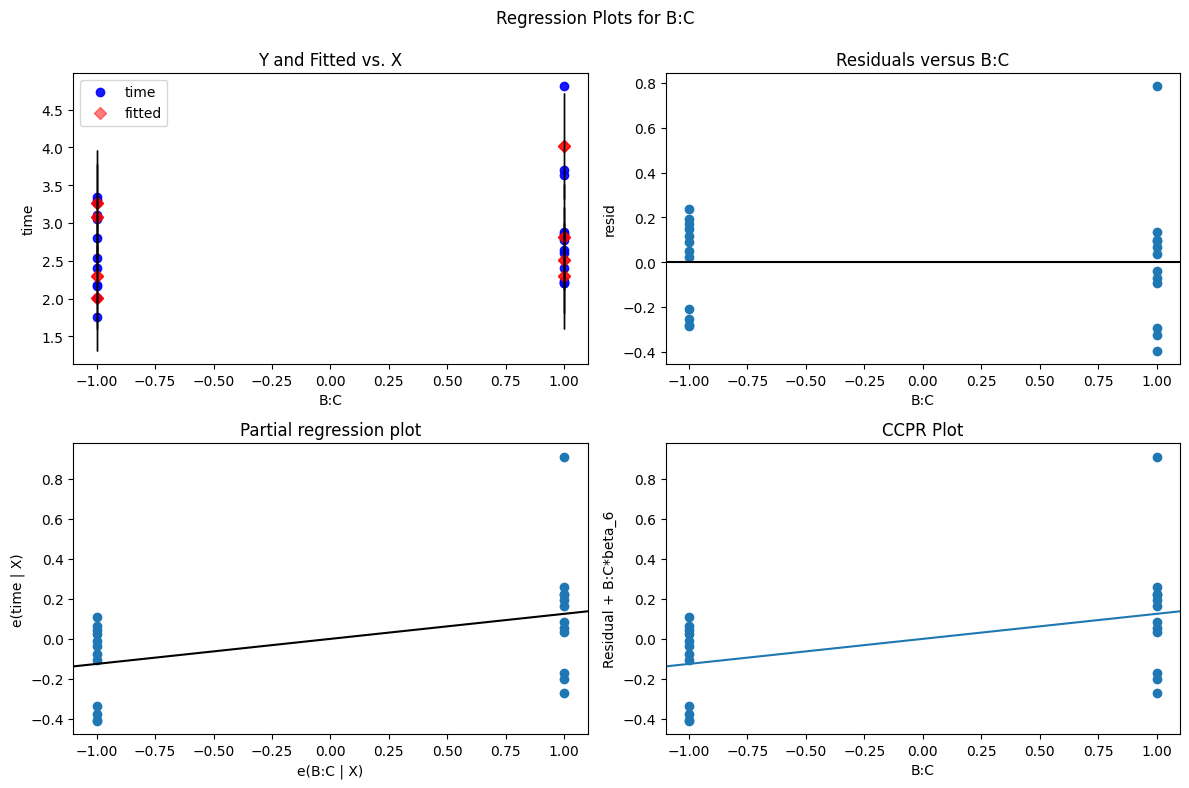

In [42]:

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(helicopter_model, 'B:C', fig=fig)

In [38]:
print(helicopter_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     17.51
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.02e-06
Time:                        23:29:08   Log-Likelihood:               -0.42400
No. Observations:                  24   AIC:                             14.85
Df Residuals:                      17   BIC:                             23.09
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7858      0.060     46.638      0.0

In [39]:
helicopter_model_AC = ols("time ~ A + B + C + A:B + A:C + B:C", data=helicopter).fit()
print(helicopter_model_AC.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     17.51
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.02e-06
Time:                        23:29:08   Log-Likelihood:               -0.42400
No. Observations:                  24   AIC:                             14.85
Df Residuals:                      17   BIC:                             23.09
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7858      0.060     46.638      0.0

In [40]:
helicopter_model_AC2 = ols("time ~ A + C + A:C", data=helicopter).fit()
print(helicopter_model_AC2.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.39e-06
Time:                        23:29:08   Log-Likelihood:                -7.5507
No. Observations:                  24   AIC:                             23.10
Df Residuals:                      20   BIC:                             27.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7858      0.074     37.590      0.0

In [41]:
helicopter_model_AB = ols("time ~ A + C + A:B", data=helicopter).fit()
print(helicopter_model_AB.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.85e-06
Time:                        23:29:08   Log-Likelihood:                -6.8161
No. Observations:                  24   AIC:                             21.63
Df Residuals:                      20   BIC:                             26.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7858      0.072     38.758      0.0

## Confirmation of Experiments

In [53]:
df = pd.read_csv("/Users/brianblood/Downloads/Lab 4 data_3.csv")
cols = df.columns.drop(['A', 'B', 'C'])

In [54]:
confirm = df.melt(id_vars=['A', 'B', 'C'], value_vars=cols, value_name='time')
confirm.drop(columns='variable', inplace=True)
confirm.head()

,A,B,C,time
0,3,1,1,2.64
1,3,1,2,2.18
2,3,2,1,2.53
3,3,2,2,2.21
4,5,1,1,4.81


In [57]:
confirm_model = ols("time ~ A + B + C", data=confirm).fit()
print(confirm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     20.09
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.00e-06
Time:                        00:13:08   Log-Likelihood:                -7.4016
No. Observations:                  24   AIC:                             22.80
Df Residuals:                      20   BIC:                             27.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8183      0.436      4.173      0.0